In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [136]:
company = "AMZN"

In [137]:
def storeData(company):
    startDate = dt.datetime(2012,1,1)
    endDate = dt.datetime.now()
    df = web.DataReader(company, data_source = 'yahoo', start=startDate, end=endDate)
    df = df.values[:, 0:-1]
    return df

In [138]:
df = storeData(company)
df.shape

(2661, 5)

In [139]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [140]:
print(df.shape)
print(dataset_train.shape)
print(dataset_test.shape)

(2661, 5)
(2128, 5)
(583, 5)


In [141]:
#Scale train and test from 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.00048347, 0.00144319, 0.00084085, 0.00125429, 0.18409301],
       [0.00088439, 0.00165459, 0.00218297, 0.00063928, 0.14467591],
       [0.        , 0.00083339, 0.00086106, 0.00067974, 0.12743528],
       [0.00251562, 0.00223593, 0.00172212, 0.00270279, 0.26668785],
       [0.00240556, 0.00203267, 0.00361807, 0.00106412, 0.18174696]])

In [142]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.73010895, 0.74217621, 0.74516208, 0.7427292 , 0.18423229],
       [0.73336349, 0.74767666, 0.74673466, 0.75543393, 0.13475634],
       [0.73690112, 0.7503232 , 0.75615373, 0.75533682, 0.16388391],
       [0.78682053, 0.75859208, 0.75441547, 0.80636207, 0.25399133],
       [0.83084395, 0.81884445, 0.81928616, 0.85266963, 0.31364364]])

In [143]:
dataset = scaler.transform(df)
dataset_test[:5]

array([[0.73010895, 0.74217621, 0.74516208, 0.7427292 , 0.18423229],
       [0.73336349, 0.74767666, 0.74673466, 0.75543393, 0.13475634],
       [0.73690112, 0.7503232 , 0.75615373, 0.75533682, 0.16388391],
       [0.78682053, 0.75859208, 0.75441547, 0.80636207, 0.25399133],
       [0.83084395, 0.81884445, 0.81928616, 0.85266963, 0.31364364]])

In [144]:
#Predict y based on ealier 50 days
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i])
        y.append(df[i])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [145]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
final_x, final_y = create_dataset(dataset)

In [146]:
print(x_train.shape)
print(x_test.shape)
print(final_x.shape)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(2078, 50, 5)
(533, 50, 5)
(2611, 50, 5)


In [147]:
#Create LSTM Model
model = Sequential()
model.add(LSTM(96, return_sequences = True, input_shape=(x_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(5))

In [148]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 50, 96)            39168     
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 50, 64)            41216     
_________________________________________________________________
dropout_22 (Dropout)         (None, 50, 64)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [149]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [150]:
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
2078/2078 [==============================] - 9s 4ms/sample - loss: 0.0122
Epoch 2/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0045
Epoch 3/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0040
Epoch 4/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0037
Epoch 5/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0037
Epoch 6/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0033
Epoch 7/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0034
Epoch 8/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0033
Epoch 9/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0032
Epoch 10/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0030
Epoch 11/30
2078/2078 [==============================] - 7s 3ms/sample - loss: 0.0030
Epoch 12/30
2078/2078 [==============================] - 7s 3ms

In [151]:
#load model

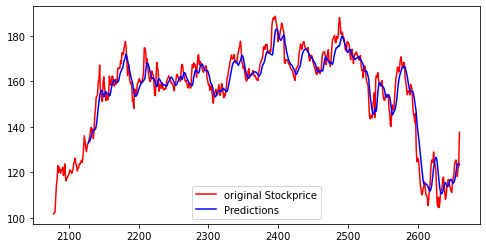

In [152]:
prediction = model.predict(x_test)

prediction = scaler.inverse_transform(prediction)
prediction = np.reshape(prediction[:,0], (-1, 1))

actual = scaler.inverse_transform(dataset_test)
actual = np.reshape(actual[:,0], (-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(range(len(y_train), len(y_train)+50+len(prediction)), actual, color="red", label="original Stockprice")
ax.plot(range(len(y_train)+50, len(y_train)+50+len(prediction)), prediction, color='blue', label='Predictions')
plt.legend()

plt.savefig("Accuracy Graph/Test-" + company + ".png")

In [153]:
(mse(prediction, actual[50:])**0.5)

5.179884308984706